In [ ]:
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots


# Special Visualization
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
# check missing value
import missingno as msno
import networkx as nx

In [ ]:
df = pd.read_csv("/content/21-PDS-007 ML Project Dataset.csv")

In [ ]:
df.head()

,years,best tag,artist,listeners,plays
0,2001,idm,Ovuca,6651,72928
1,2018,rock,Queens of the Stone Age,795895,31210308
2,2008,progressive metal,Zero Hour,7622,114322
3,2008,rock,The Pretenders,286256,2047145
4,1995,grunge,Mad Season,65239,895537


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   years      1238 non-null   int64 
 1   best tag   1238 non-null   object
 2   artist     1238 non-null   object
 3   listeners  1238 non-null   int64 
 4   plays      1238 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 48.5+ KB


In [ ]:
df.isnull().sum()

years        0
best tag     0
artist       0
listeners    0
plays        0
dtype: int64

In [ ]:
df.shape

(1238, 5)

In [ ]:
df.sort_values('listeners' , ascending=False)

,years,best tag,artist,listeners,plays
781,2007,alternative,Radiohead,1578617,122925432
31,2006,rock,Red Hot Chili Peppers,1513652,82736296
950,1990,classic rock,The Beatles,1485095,125668088
140,2008,indie,The Killers,1304230,49881132
7,1996,grunge,Nirvana,1302868,48686884
...,...,...,...,...,...
662,1999,grunge,Gruntruck,1174,35678
275,2003,hard rock,SupaRed,517,14620
339,2007,hard rock,Danny Vaughn,400,14631
1145,2007,seen live,Mike Tamburo,374,2861


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b511093d0>]],
      dtype=object)

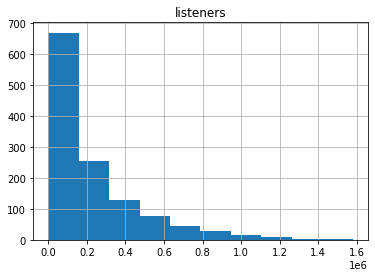

In [ ]:
df.hist('listeners')

In [ ]:
df.sort_values('years')

,years,best tag,artist,listeners,plays
921,1988,80s,Mr. Mister,102644,450035
621,1989,funk,Zapp,19826,81650
1112,1989,post-punk,Joy Division,588022,17964380
950,1990,classic rock,The Beatles,1485095,125668088
447,1990,80s,Johnny Hates Jazz,38429,159187
...,...,...,...,...,...
765,2019,singer-songwriter,Ben Folds,397033,10910804
1099,2019,hardcore,Down to Nothing,17303,950988
1152,2019,classic rock,The Kinks,596399,11789588
1160,2019,heavy metal,Jon Oliva,245,3115


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b51016e90>]],
      dtype=object)

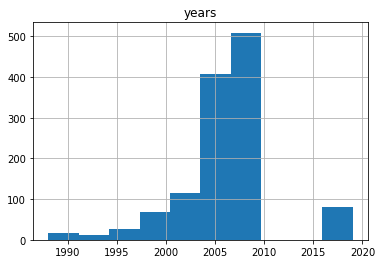

In [ ]:
df.hist('years')

In [ ]:
x=df[df["plays"]==125668088]
x.head()

,years,best tag,artist,listeners,plays
950,1990,classic rock,The Beatles,1485095,125668088


In [ ]:
y=df[df["years"]== 2008]
y.head()

,years,best tag,artist,listeners,plays
2,2008,progressive metal,Zero Hour,7622,114322
3,2008,rock,The Pretenders,286256,2047145
10,2008,electronic,Goldfrapp,657641,13237139
11,2008,singer-songwriter,Marc Broussard,32354,420745
13,2008,chillout,De-Phazz,243128,3603833


In [ ]:
y.count()

years        231
best tag     231
artist       231
listeners    231
plays        231
dtype: int64

In [ ]:
df1 =df.drop(['years','best tag'],axis=1)

In [ ]:
df1

,artist,listeners,plays
0,Ovuca,6651,72928
1,Queens of the Stone Age,795895,31210308
2,Zero Hour,7622,114322
3,The Pretenders,286256,2047145
4,Mad Season,65239,895537
...,...,...,...
1233,Jay-Z,494588,14009495
1234,Andrew Bird,318830,10753609
1235,Screeching Weasel,61348,1611919
1236,The Cranberries,740004,14610473


In [ ]:
df1.corr()

,listeners,plays
listeners,1.000000,0.864416
plays,0.864416,1.000000


In [ ]:
print(df1)

                       artist  listeners     plays
0                       Ovuca       6651     72928
1     Queens of the Stone Age     795895  31210308
2                   Zero Hour       7622    114322
3              The Pretenders     286256   2047145
4                  Mad Season      65239    895537
...                       ...        ...       ...
1233                    Jay-Z     494588  14009495
1234              Andrew Bird     318830  10753609
1235        Screeching Weasel      61348   1611919
1236          The Cranberries     740004  14610473
1237             Dire Straits     593210  11075350

[1238 rows x 3 columns]


In [ ]:
len(df.artist.value_counts())

1238

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b50b07e90>]],
      dtype=object)

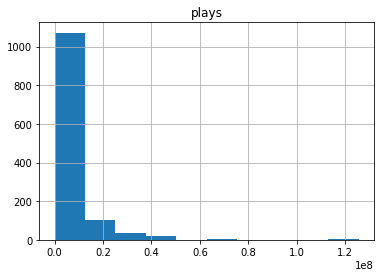

In [ ]:
df[["best tag", "plays"]].hist()

In [ ]:
df1 = df.groupby('artist').count().reset_index().sort_values('best tag' , ascending=False).head(10)
print(df1)

                       artist  years  best tag  listeners  plays
0                      *NSYNC      1         1          1      1
823            REO Speedwagon      1         1          1      1
830                   Rainbow      1         1          1      1
829  Rage Against the Machine      1         1          1      1
828                   Raekwon      1         1          1      1
827                 Radiohead      1         1          1      1
826            Rachel Stevens      1         1          1      1
825          Rachael Yamagata      1         1          1      1
824                      RJD2      1         1          1      1
822                    R.E.M.      1         1          1      1


In [ ]:
df2 = df.groupby('best tag').count().reset_index().sort_values('plays' , ascending=False).head(10)
print(df2)

        best tag  years  artist  listeners  plays
43         indie    108     108        108    108
79          rock     84      84         84     84
64           pop     72      72         72     72
22    electronic     54      54         54     54
75          punk     50      50         50     50
11  classic rock     48      48         48     48
0            80s     39      39         39     39
37      hardcore     36      36         36     36
36     hard rock     35      35         35     35
23           emo     32      32         32     32


In [ ]:
indie = df[df["best tag"]=='indie']
indie.head(10)

,years,best tag,artist,listeners,plays
27,2007,indie,Maxïmo Park,297291,7210927
47,2006,indie,The Decemberists,566865,21796128
56,2003,indie,Sorry About Dresden,10768,110873
59,2007,indie,Say Anything,218188,10911455
67,2008,indie,TV on the Radio,385900,8624126
79,2007,indie,Architecture in Helsinki,410936,12516899
84,2008,indie,Silver Jews,125881,2290991
93,2004,indie,Pedro the Lion,186325,3676440
120,2007,indie,Modest Mouse,860667,41614160
134,2007,indie,The Rocket Summer,122924,5392169


In [ ]:
rock = df[df["best tag"]=='rock']
rock.head(10)

,years,best tag,artist,listeners,plays
1,2018,rock,Queens of the Stone Age,795895,31210308
3,2008,rock,The Pretenders,286256,2047145
31,2006,rock,Red Hot Chili Peppers,1513652,82736296
37,2008,rock,Taproot,147552,2269090
92,2004,rock,INXS,354107,5946636
111,2007,rock,Sting,546165,8025008
144,2008,rock,David Bowie,1057543,32845218
148,2008,rock,Theory of a Deadman,103805,1925600
159,2007,rock,Ash,253995,3788169
218,2001,rock,Bush,424013,6473032


In [ ]:
pop = df[df["best tag"]=='pop']
pop.head(10)

,years,best tag,artist,listeners,plays
33,1995,pop,Paula Abdul,93358,538177
51,2006,pop,Liberty X,46335,297086
53,2006,pop,All Saints,212107,1695152
71,2007,pop,Mandy Moore,199783,2617207
78,2005,pop,Daniel Bedingfield,140731,1173802
80,2006,pop,Nelly Furtado,861288,18558998
82,1998,pop,Prefab Sprout,54235,652676
86,2003,pop,Michelle Branch,320600,4347215
96,2007,pop,Lisa Scott-Lee,9145,81252
104,2006,pop,Tina Turner,247849,1778220


In [ ]:
len(x)

1

In [ ]:
#popularity
popularity = [ 0,0,0,0]
for i in df['plays']:
  if i >= 120000000:
    popularity[0] += 1
  elif i >= 10000000:
    popularity [1] +=1
  elif i >= 1000000:
    popularity [2] +=1
  else:
    popularity [3] +=1

In [ ]:
pop = ['Extremely Popular(120000000)' , 'Very Popular(10000000)' , 'Fairly Popular(1000000)' , 'Popular(100000)']

In [ ]:
fig = go.Figure([go.Bar(x=pop, y=popularity)])
fig.show()


In [ ]:
df3 =  pd.DataFrame( columns=pop)

df3

,Extremely Popular(120000000),Very Popular(10000000),Fairly Popular(1000000),Popular(100000)


In [ ]:
df6 = pd.DataFrame({'Extremely_Popular': 2},
                  index=['Plays_1'])

df6 = df6.assign(Very_Popular=217,Fairly_Popular=564,Popular=455)
df6

,Extremely_Popular,Very_Popular,Fairly_Popular,Popular
Plays_1,2,217,564,455


In [ ]:
df8 = pd.DataFrame({'plays':[ 2,217,564,455]},
                  index=['Extremely_popular','very_popular','fairly_popular','popular'])
df8

,plays
Extremely_popular,2
very_popular,217
fairly_popular,564
popular,455


In [ ]:
df4 = df.sort_values('plays',ascending=False).head(2)
df4

,years,best tag,artist,listeners,plays
950,1990,classic rock,The Beatles,1485095,125668088
781,2007,alternative,Radiohead,1578617,122925432


In [ ]:
df4.index = ('plays_1','plays_2')
df4

,years,best tag,artist,listeners,plays
plays_1,1990,classic rock,The Beatles,1485095,125668088
plays_2,2007,alternative,Radiohead,1578617,122925432
